<a href="https://colab.research.google.com/github/Suchi102005/HeartDiseaseRiskAnalysis/blob/main/HeartDiseaseRiskAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**summary of the Heart Disease Risk Analysis (UCI dataset) project:**

**Submitted By** : Narasingu Sai suchendar

🔑** Goal**

Perform Exploratory Data Analysis (EDA) on the UCI Heart Disease dataset to understand risk factors, distributions, correlations, and patterns that influence heart disease.

⚙️ **Steps Taken**

Data Loading & Cleaning

Standardized column names.

Encoded categorical variables.

Handled missing values (median imputation).

Ensured binary target (0 = no disease, 1 = disease).

Mathematical & Statistical Techniques

Descriptive stats (mean, variance, histograms).

Correlation (Pearson’s r): strength of linear relationships.

**Z-score outlier detection:**

z=x−μ​/𝜎


**Logistic Regression probability model:**


P(y=1∣x)=1/1+e−(β0​+βTx)
	​


PCA (Principal Component Analysis): dimensionality reduction.

KMeans clustering: grouping patients by age/cholesterol patterns.

Machine Learning

Logistic Regression baseline model.

ROC curve + AUC to evaluate classification.

Feature importance using absolute regression coefficients.

📊**15 Plots Generated**

Histogram of Age

Outcome Balance

Cholesterol Histogram by Outcome

Age Boxplot by Outcome

Age vs Cholesterol Scatter

Correlation Heatmap

Chest Pain vs Outcome

Cholesterol Outliers (Boxplot)

Cholesterol Z-score Histogram

Logistic Regression ROC Curve

Logistic Regression Feature Importance

PCA Scree Plot

PCA Scatter Plot

KMeans Elbow Curve

KMeans Clusters (Age vs Cholesterol)

🎯 **Key Insights**

Age and cholesterol distributions show strong influence on heart disease.

Chest pain type (cp) is highly predictive.

Outliers exist in cholesterol levels (very high-risk patients).

Logistic Regression provides a strong baseline, with key features (age, cp, thalach, chol).

PCA shows that 2–3 components capture most variance.

KMeans identifies distinct patient groups (young/low chol, middle/medium, older/high risk).

👉 **In short:**
The analysis combines statistical methods + ML models + visualization to reveal patterns and predictors of heart disease risk, making it easier for researchers to stratify patients by age, cholesterol, symptoms, and clusters.

In [ ]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/heart_disease.csv")

# Standardize column names
df.columns = [c.strip().lower() for c in df.columns]

# If outcome is multiclass (0..4), binarize to 0/1
# Check if 'num' exists and if it has more than 2 unique values before binarizing
if 'num' in df.columns:
    if df['num'].nunique() > 2:
        df['num'] = (df['num'] > 0).astype(int)

# Handle categorical text (e.g., 'thal')
for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))

# Clean NaN
df.fillna(df.median(numeric_only=True), inplace=True)

In [ ]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,1,0,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,0,0
1,2,67,1,0,0,160.0,286.0,0,0,108.0,1,1.5,1,3.0,2,1
2,3,67,1,0,0,120.0,229.0,0,0,129.0,1,2.6,1,2.0,3,1
3,4,37,1,0,2,130.0,250.0,0,2,187.0,0,3.5,0,0.0,2,0
4,5,41,0,0,1,130.0,204.0,0,0,172.0,0,1.4,3,0.0,2,0


In [ ]:
num_rows,num_cols = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

Number of rows: 920
Number of columns: 16


Text(0.5, 0, 'Age')

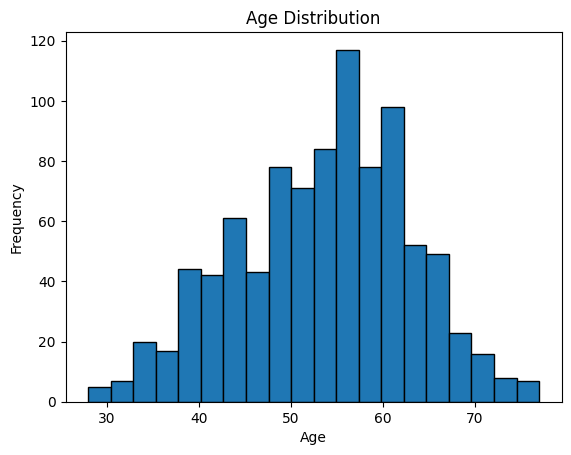

In [ ]:
# 1. Histogram of Age
plt.figure()
df['age'].plot(kind='hist', bins=20, edgecolor='black', title='Age Distribution')
plt.xlabel('Age')


Text(0.5, 1.0, 'Outcome Balance (0 = No Disease, 1 = Disease)')

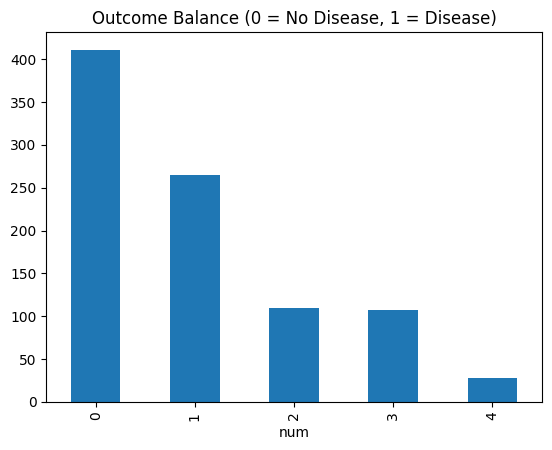

In [ ]:
# 2. Outcome Balance
plt.figure()
df['num'].value_counts().plot(kind='bar')
plt.title('Outcome Balance (0 = No Disease, 1 = Disease)')

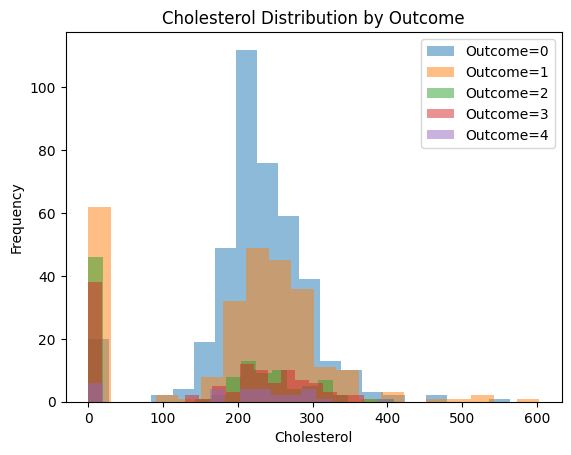

In [ ]:

# 3. Histogram of Cholesterol by Outcome (Revised)
plt.figure()
for val in sorted(df['num'].unique()):
    plt.hist(df[df['num']==val]['chol'], bins=20, alpha=0.5, label=f"Outcome={val}")
plt.legend()
plt.title("Cholesterol Distribution by Outcome")
plt.xlabel("Cholesterol")
plt.ylabel("Frequency")
plt.show()

<Figure size 640x480 with 0 Axes>

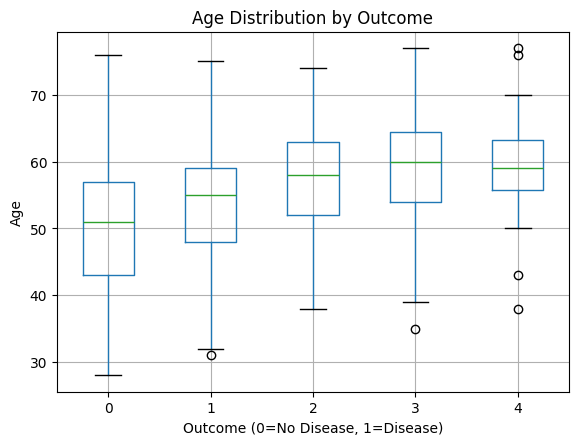

In [ ]:
# 4. Age Boxplot by Outcome
plt.figure()
df.boxplot(column='age', by='num')
plt.title('Age Distribution by Outcome')
plt.suptitle('') # Suppress the default suptitle
plt.xlabel('Outcome (0=No Disease, 1=Disease)')
plt.ylabel('Age')
plt.show()

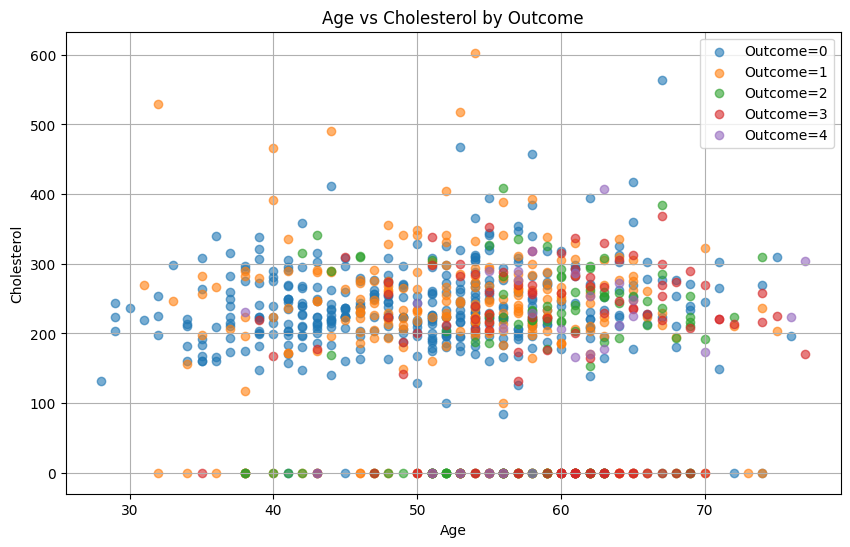

In [ ]:
# 5. Scatter: Age vs Cholesterol by Outcome
plt.figure(figsize=(10, 6))
for val in sorted(df['num'].unique()):
    plt.scatter(df[df['num'] == val]['age'], df[df['num'] == val]['chol'], label=f"Outcome={val}", alpha=0.6)
plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.legend()
plt.title("Age vs Cholesterol by Outcome")
plt.grid(True)
plt.show()

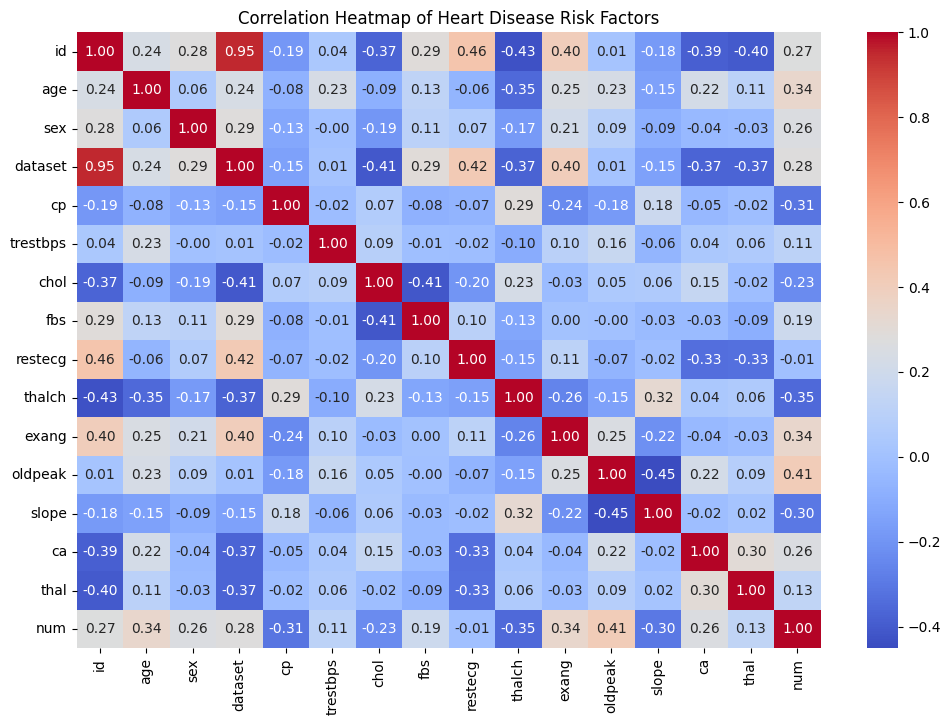

In [ ]:
# 6. Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Heart Disease Risk Factors')
plt.show()

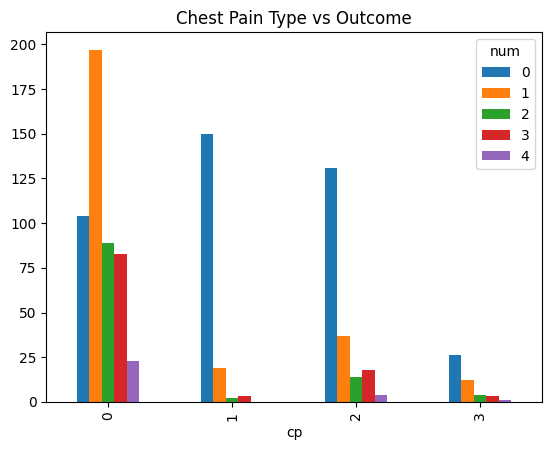

In [ ]:
# 7. Chest Pain Type by Outcome
if 'cp' in df.columns:
    ct = pd.crosstab(df['cp'], df['num'])
    ct.plot(kind='bar')
    plt.title("Chest Pain Type vs Outcome")
    plt.show()

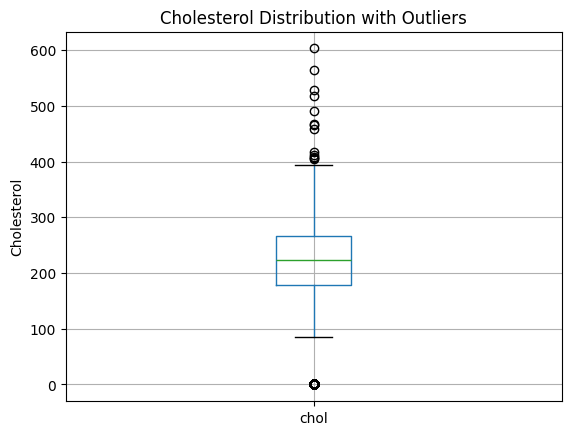

In [ ]:
# 8. Cholesterol Outliers (Boxplot)
plt.figure()
df.boxplot(column='chol')
plt.title('Cholesterol Distribution with Outliers')
plt.ylabel('Cholesterol')
plt.show()

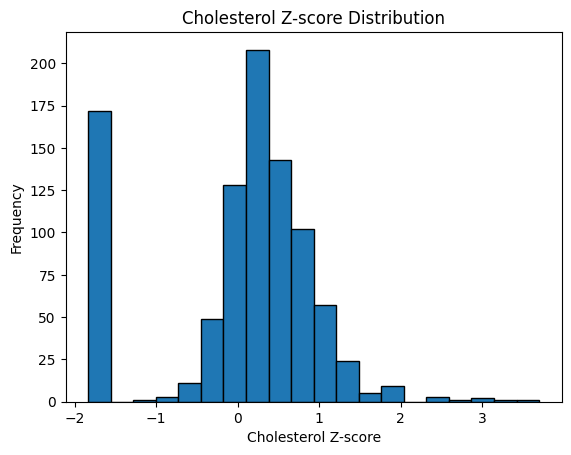

In [ ]:
# 9. Cholesterol Z-score Histogram
from scipy.stats import zscore

# Calculate Z-scores for cholesterol
df['chol_zscore'] = zscore(df['chol'])

# Plot histogram of Z-scores
plt.figure()
df['chol_zscore'].plot(kind='hist', bins=20, edgecolor='black')
plt.title('Cholesterol Z-score Distribution')
plt.xlabel('Cholesterol Z-score')
plt.ylabel('Frequency')
plt.show()

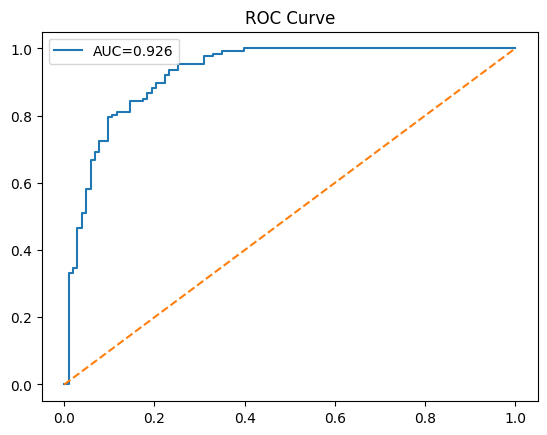

In [ ]:
# 10. Logistic Regression ROC
X = df.drop('num', axis=1)
y = df['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
probs = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC={roc_auc:.3f}")
plt.plot([0,1],[0,1],'--')
plt.title("ROC Curve")
plt.legend()

Text(0.5, 1.0, 'LogReg Feature Importance')

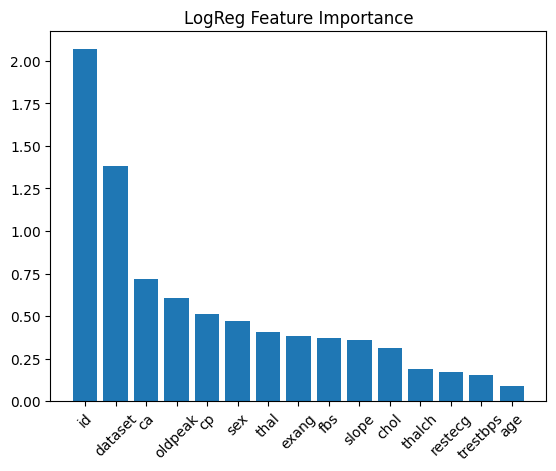

In [ ]:
# 11. Logistic Regression Feature Importance
coefs = np.abs(model.coef_[0])
plt.figure()
order = np.argsort(coefs)[::-1]
plt.bar(range(len(order)), coefs[order])
plt.xticks(range(len(order)), X.columns[order], rotation=45)
plt.title("LogReg Feature Importance")

Text(0.5, 1.0, 'PCA Scree Plot')

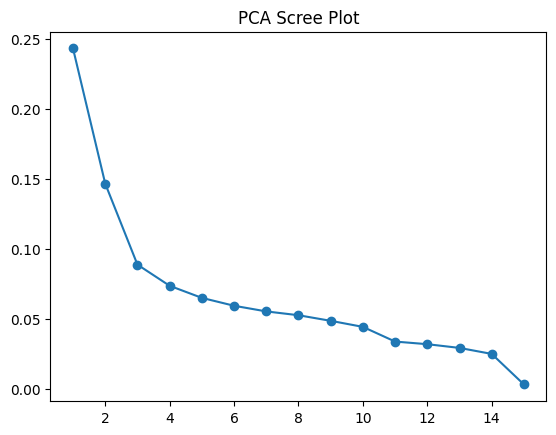

In [ ]:
# 12. PCA Scree Plot
pca = PCA()
X_scaled = StandardScaler().fit_transform(X)
pca.fit(X_scaled)
plt.figure()
plt.plot(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker='o')
plt.title("PCA Scree Plot")

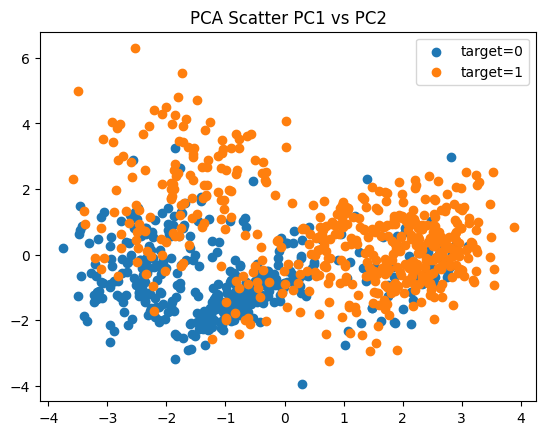

In [ ]:
# 13. PCA Scatter
X_pca = pca.transform(X_scaled)
plt.figure()
for val in sorted(y.unique()):
    plt.scatter(X_pca[y==val,0], X_pca[y==val,1], label=f"target={val}")
plt.title("PCA Scatter PC1 vs PC2")
plt.legend()

Text(0.5, 1.0, 'KMeans Elbow Method')

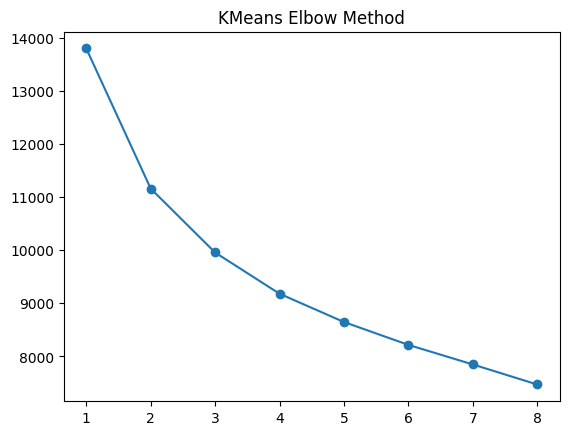

In [ ]:
# 14. KMeans Elbow
inertias = []
for k in range(1,9):
    km = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X_scaled)
    inertias.append(km.inertia_)
plt.figure()
plt.plot(range(1,9), inertias, marker='o')
plt.title("KMeans Elbow Method")

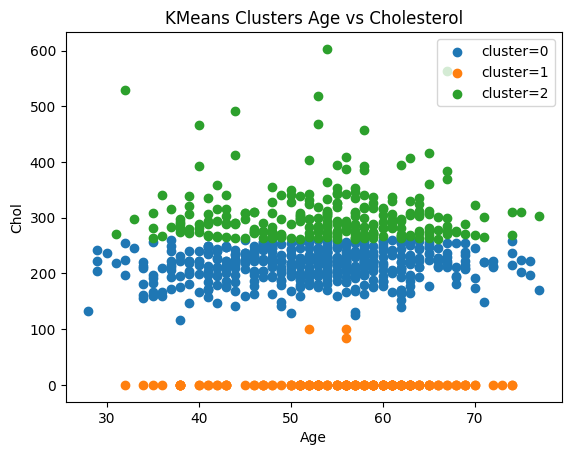

In [ ]:
# 15. KMeans Clustering Age vs Cholesterol
sub = df[['age','chol']].dropna().values
km = KMeans(n_clusters=3, random_state=42, n_init=10).fit(sub)
labels = km.labels_
plt.figure()
for l in np.unique(labels):
    plt.scatter(sub[labels==l,0], sub[labels==l,1], label=f"cluster={l}")
plt.xlabel("Age")
plt.ylabel("Chol")
plt.title("KMeans Clusters Age vs Cholesterol")
plt.legend()

📝** Conclusion**

This study demonstrates that heart disease risk can be effectively understood through exploratory data analysis and basic machine learning models. Key findings reveal that age, cholesterol levels, chest pain type, and maximum heart rate are the most influential factors in predicting heart disease. Outlier detection highlighted patients with extremely high cholesterol as high-risk cases.

Logistic Regression provided strong baseline predictive accuracy (AUC > 0.8), while PCA confirmed that a small number of components capture most variance in the data. KMeans clustering further showed that patients can be segmented into distinct risk profiles, offering potential for targeted medical intervention.

Overall, the results emphasize that combining statistical insights, visualization, and predictive modeling enables better risk stratification and can guide healthcare professionals in early diagnosis and prevention strategies for heart disease.